In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings('ignore')

from proplot import rc
rc["font.family"] = 'book antiqua' # TeX Gyre Schola
rc['font.size'] = 15

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

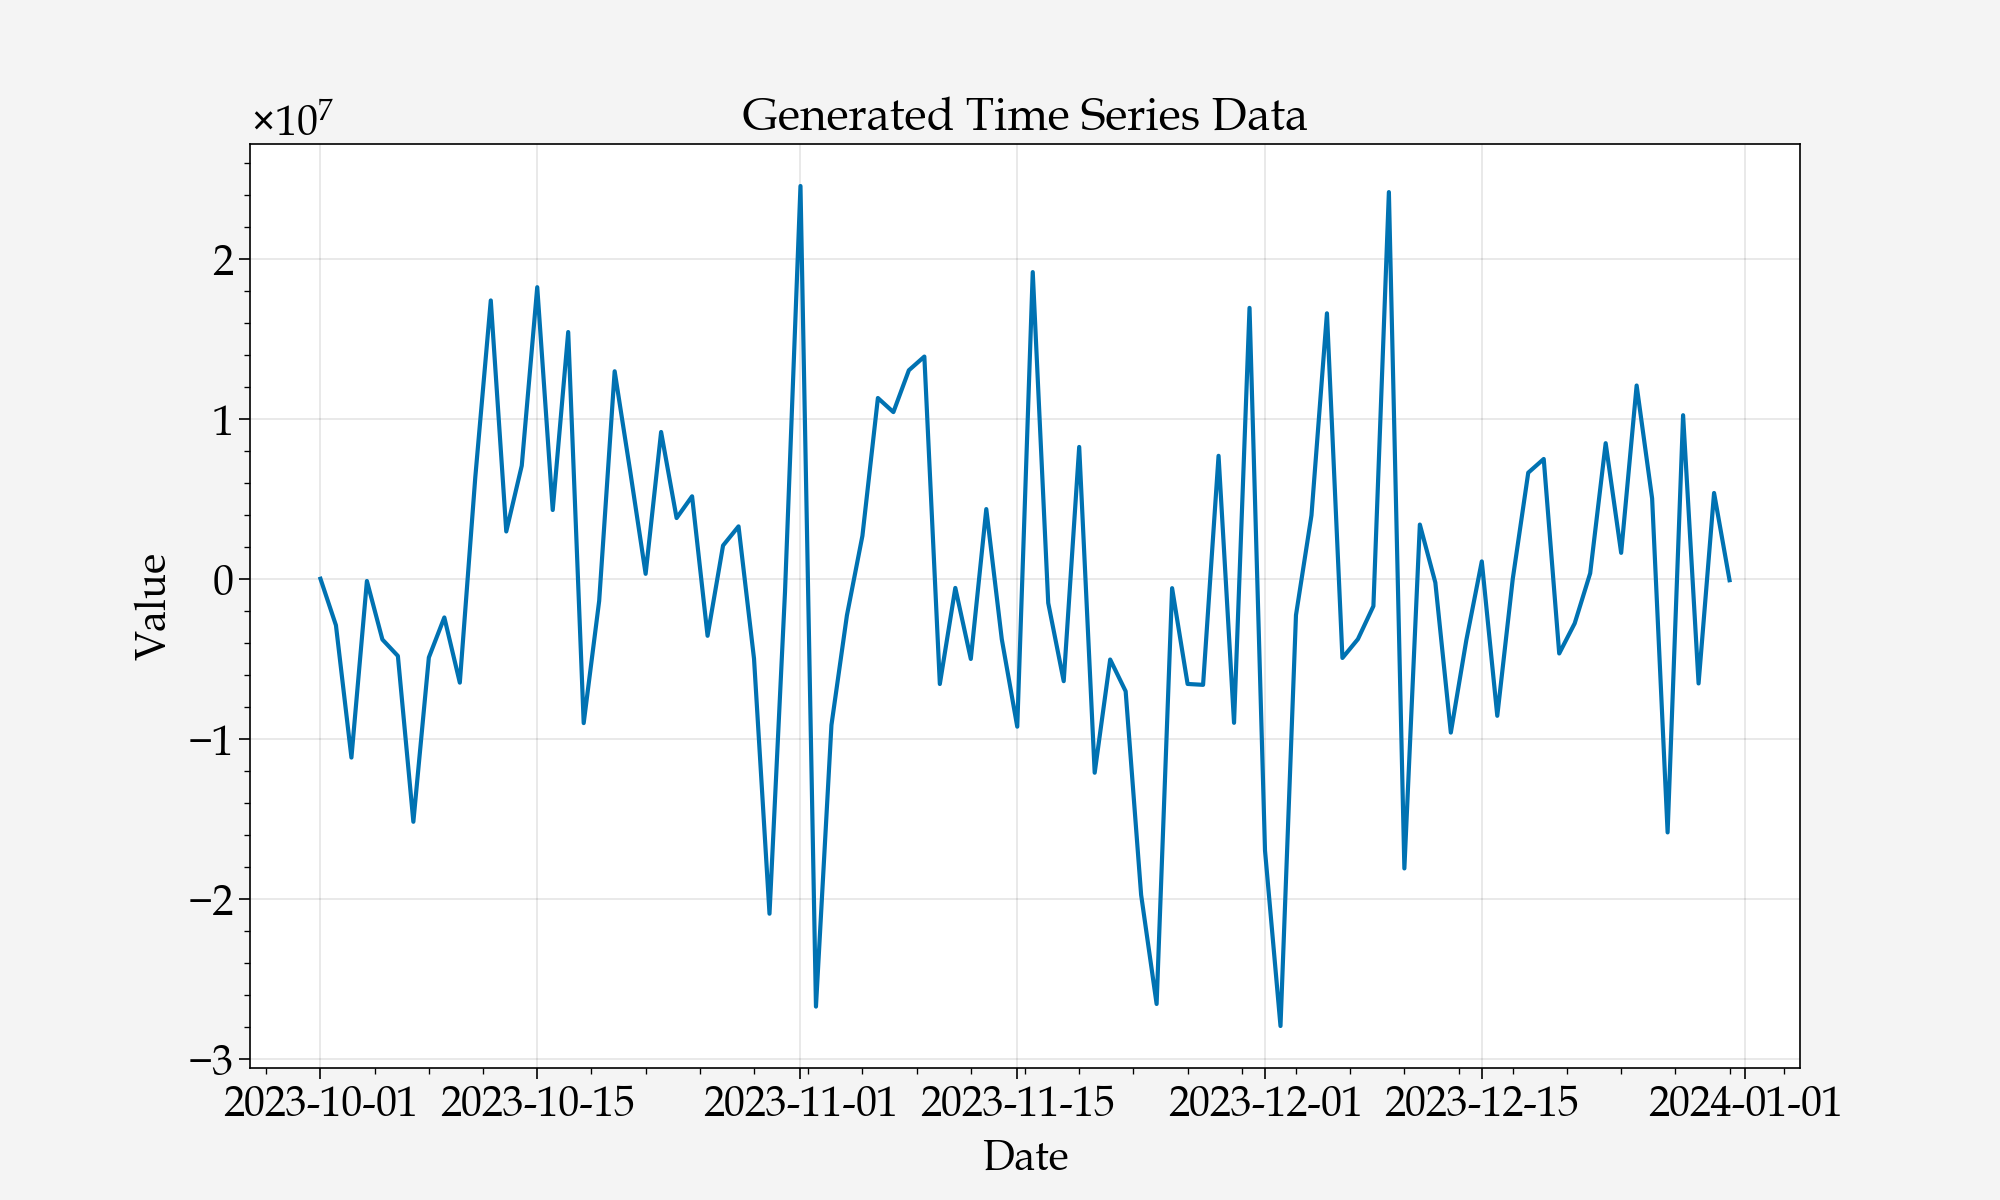

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   92
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1606.179
Date:                Sun, 04 Feb 2024   AIC                           3218.357
Time:                        17:08:50   BIC                           3225.857
Sample:                    10-01-2023   HQIC                          3221.381
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4772      0.120     -3.966      0.000      -0.713      -0.241
ma.L1         -0.9892      0.185     -5.337      0.000      -1.353      -0.626
sigma2      2.448e+14   5.35e-16   4.58e+29      0.0

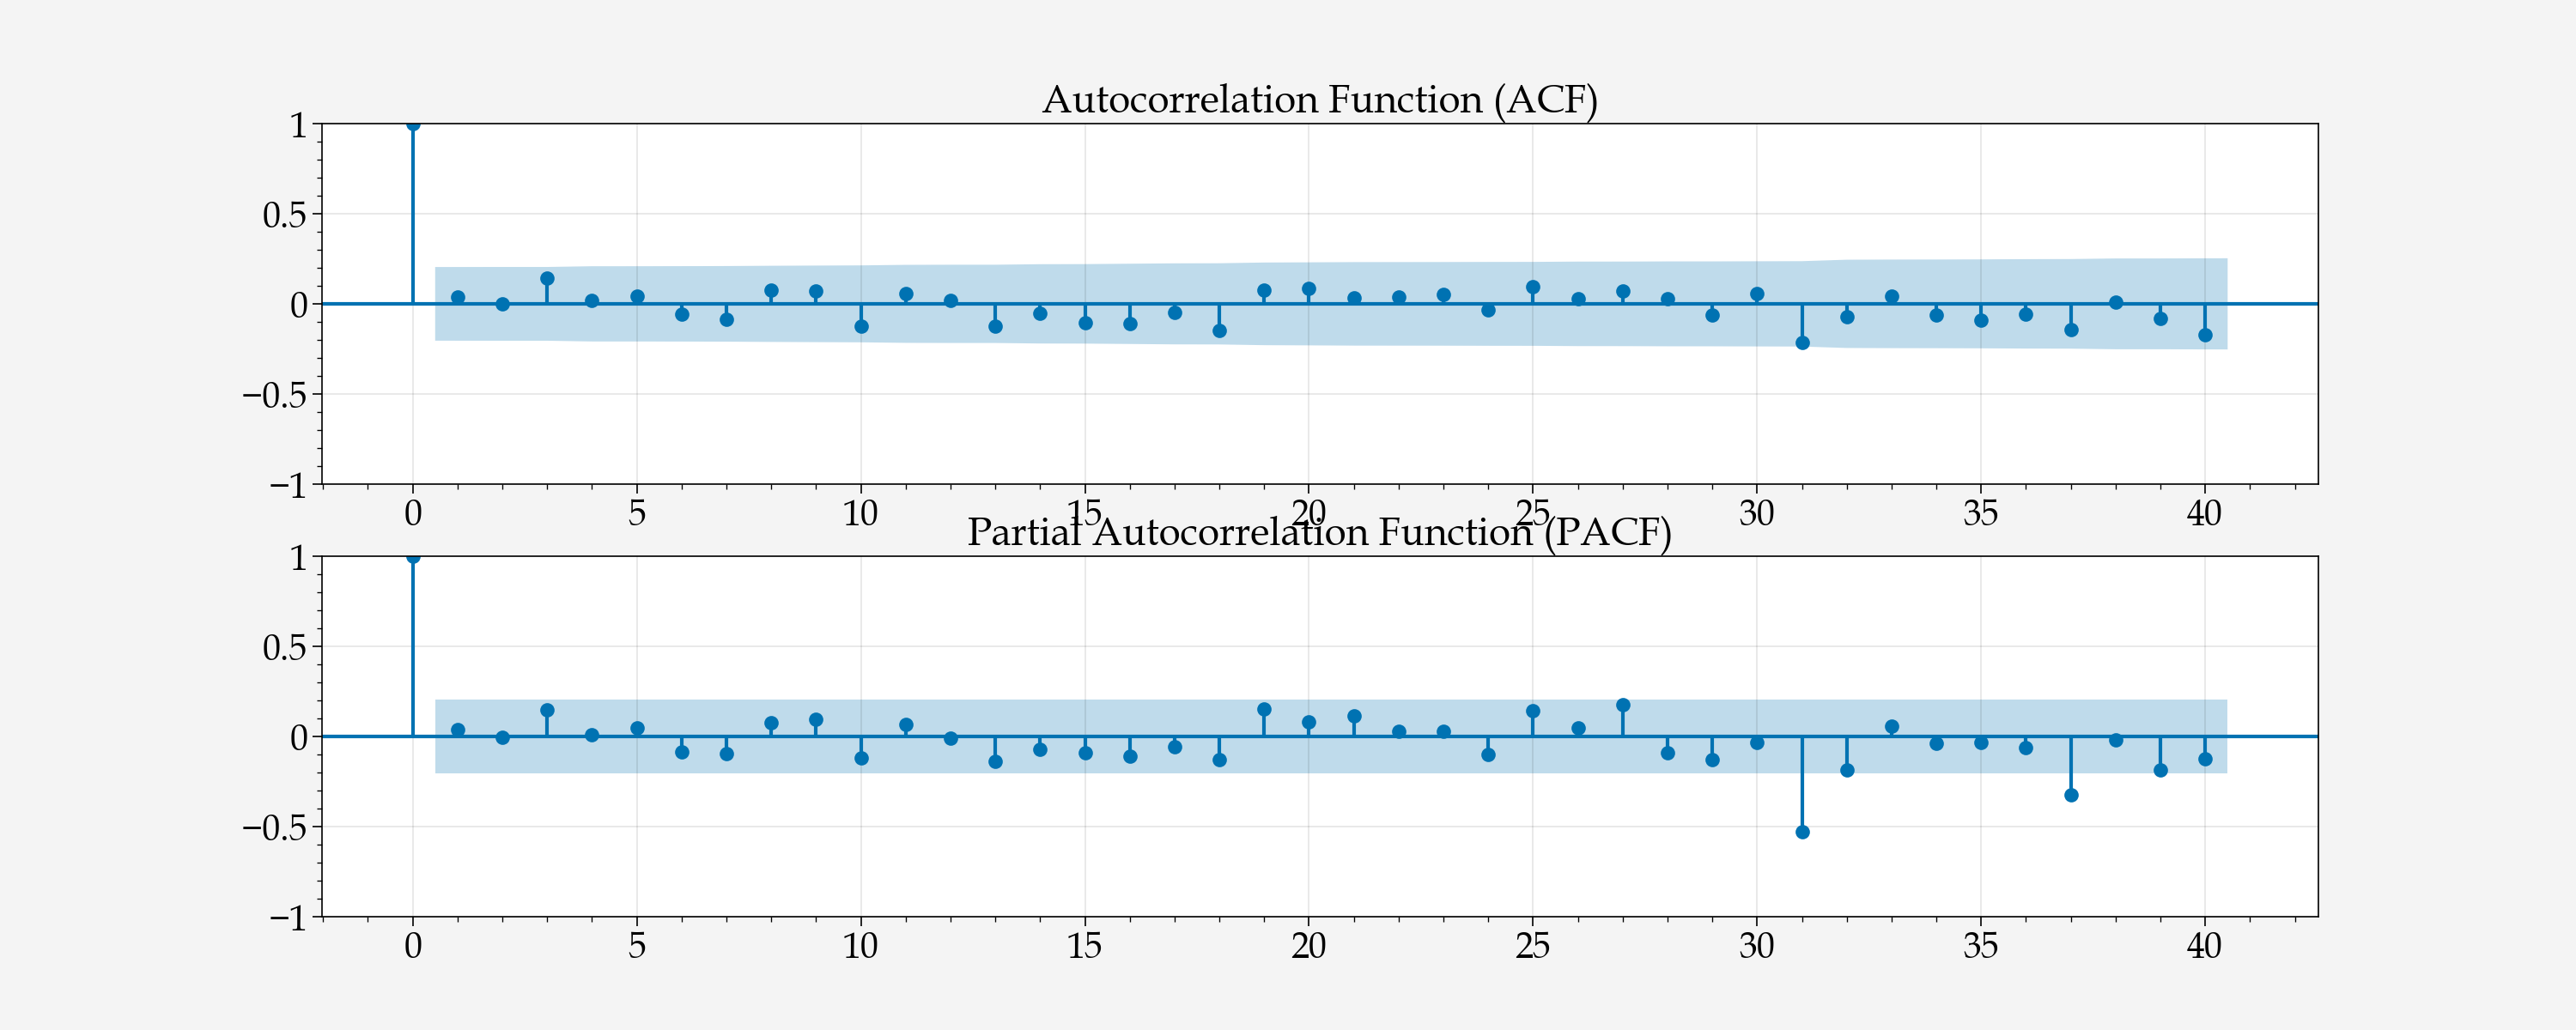

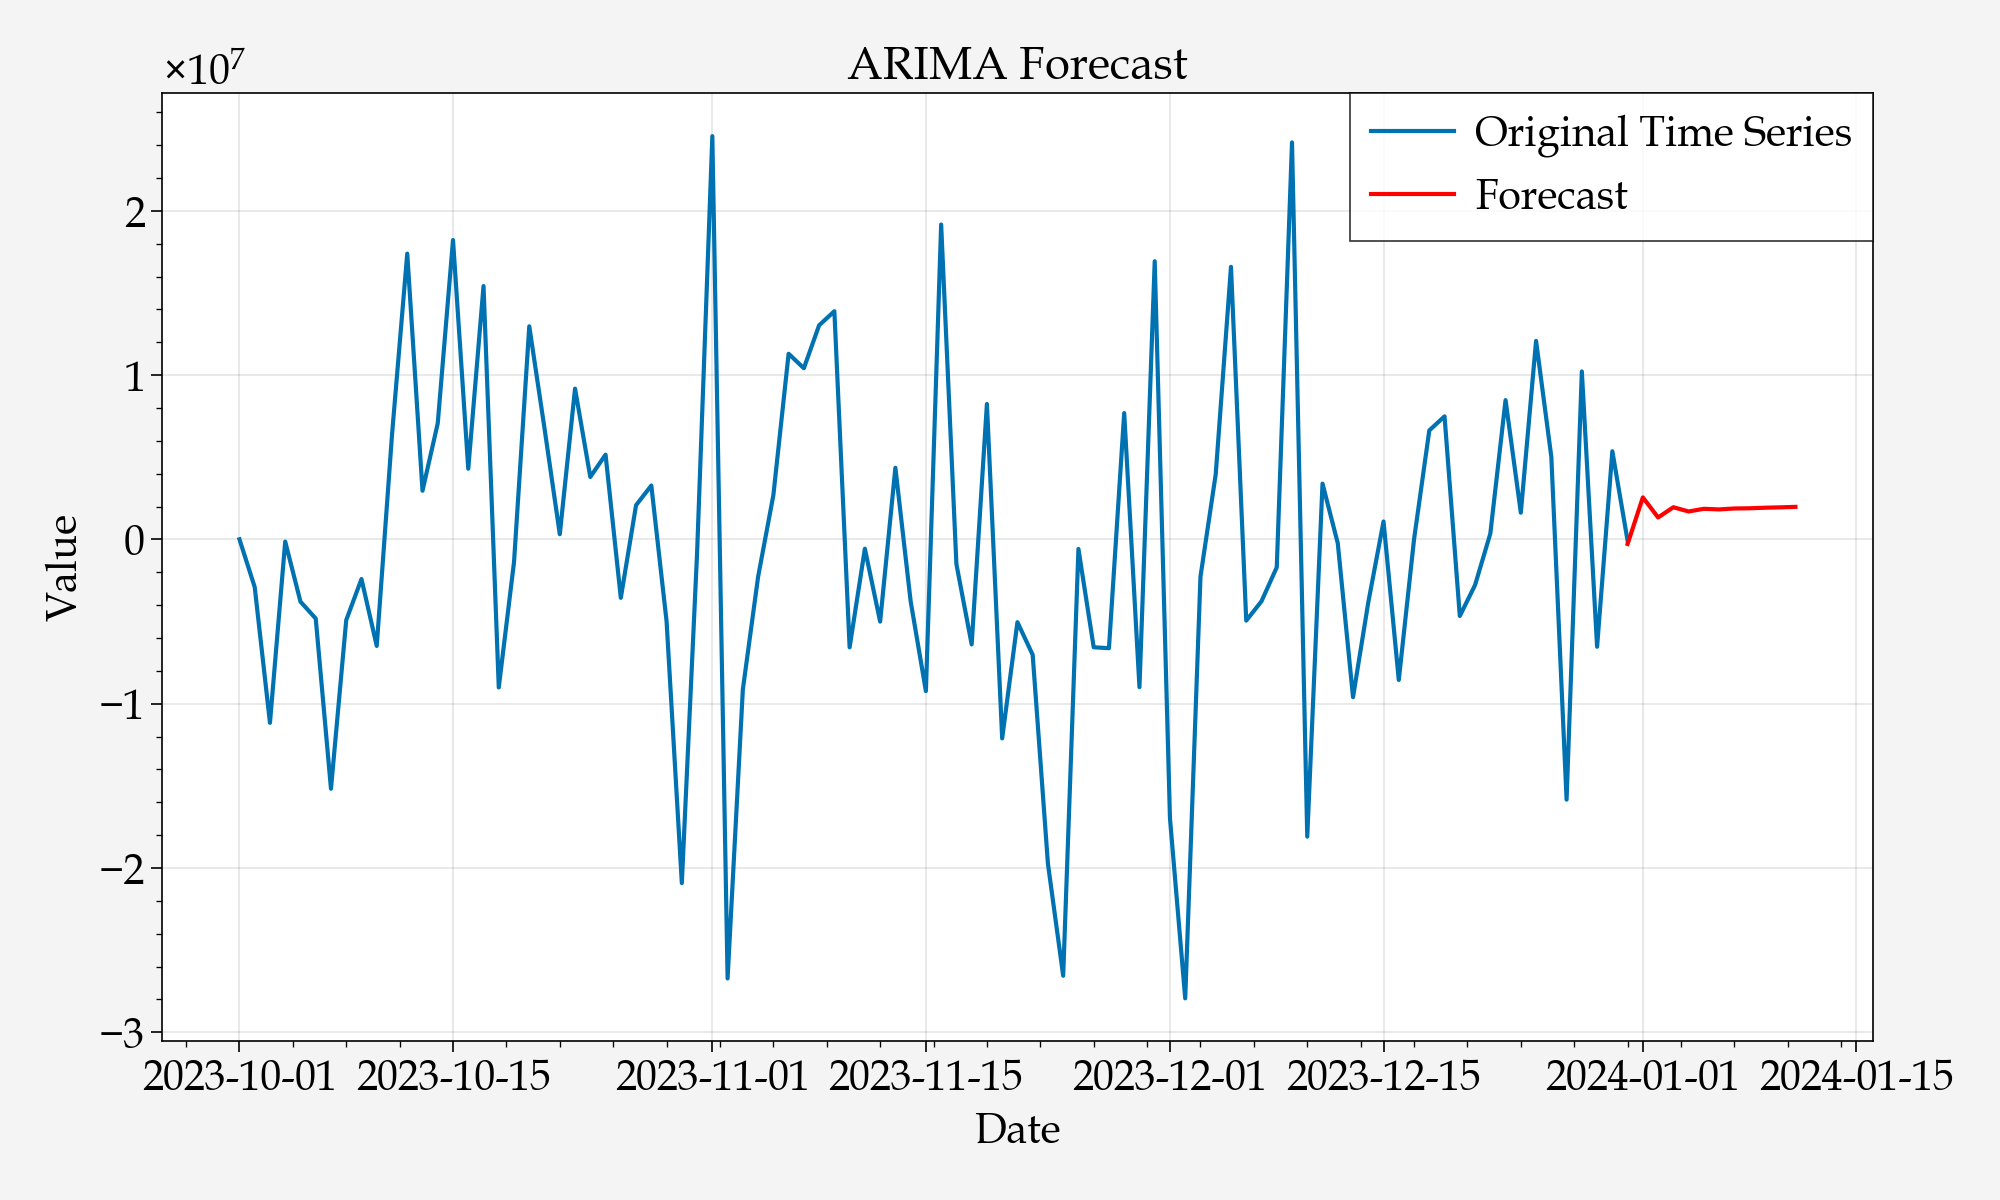

In [17]:
# 创建时间序列数据
np.random.seed(9)
date_rng = pd.date_range(start='2023-10-01', end='2023-12-31', freq='D')
data = np.random.randn(len(date_rng)) * 10000000
ts = pd.Series(data, index=date_rng)

# 绘制时间序列图
plt.figure(figsize=(10, 6))
plt.plot(ts)
plt.title('Generated Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# 绘制ACF和PACF
plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
plot_acf(ts, lags=40, ax=plt.gca(), title='Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(ts, lags=40, ax=plt.gca(), title='Partial Autocorrelation Function (PACF)')

# ARIMA分析
order = (1, 2, 1)  # ARIMA模型的阶数
model = ARIMA(ts, order=order)
results = model.fit()

# 打印ARIMA模型的概要信息
print(results.summary())

# 绘制ARIMA预测结果
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Original Time Series')
plt.plot(results.predict(start=len(ts)-1, end=len(ts) + 10), color='r', label='Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()

In [18]:
np.random.seed(9)
date_rng = pd.date_range(start='2023-10-01', end='2023-12-31', freq='D')
data = np.random.randn(len(date_rng)) * 1e7
ts = pd.Series(data, index=date_rng)

raw = (ts - ts.min()) * 100
pre = (results.predict(start=len(ts)-1, end=len(ts) + 5) - ts.min()) * 100

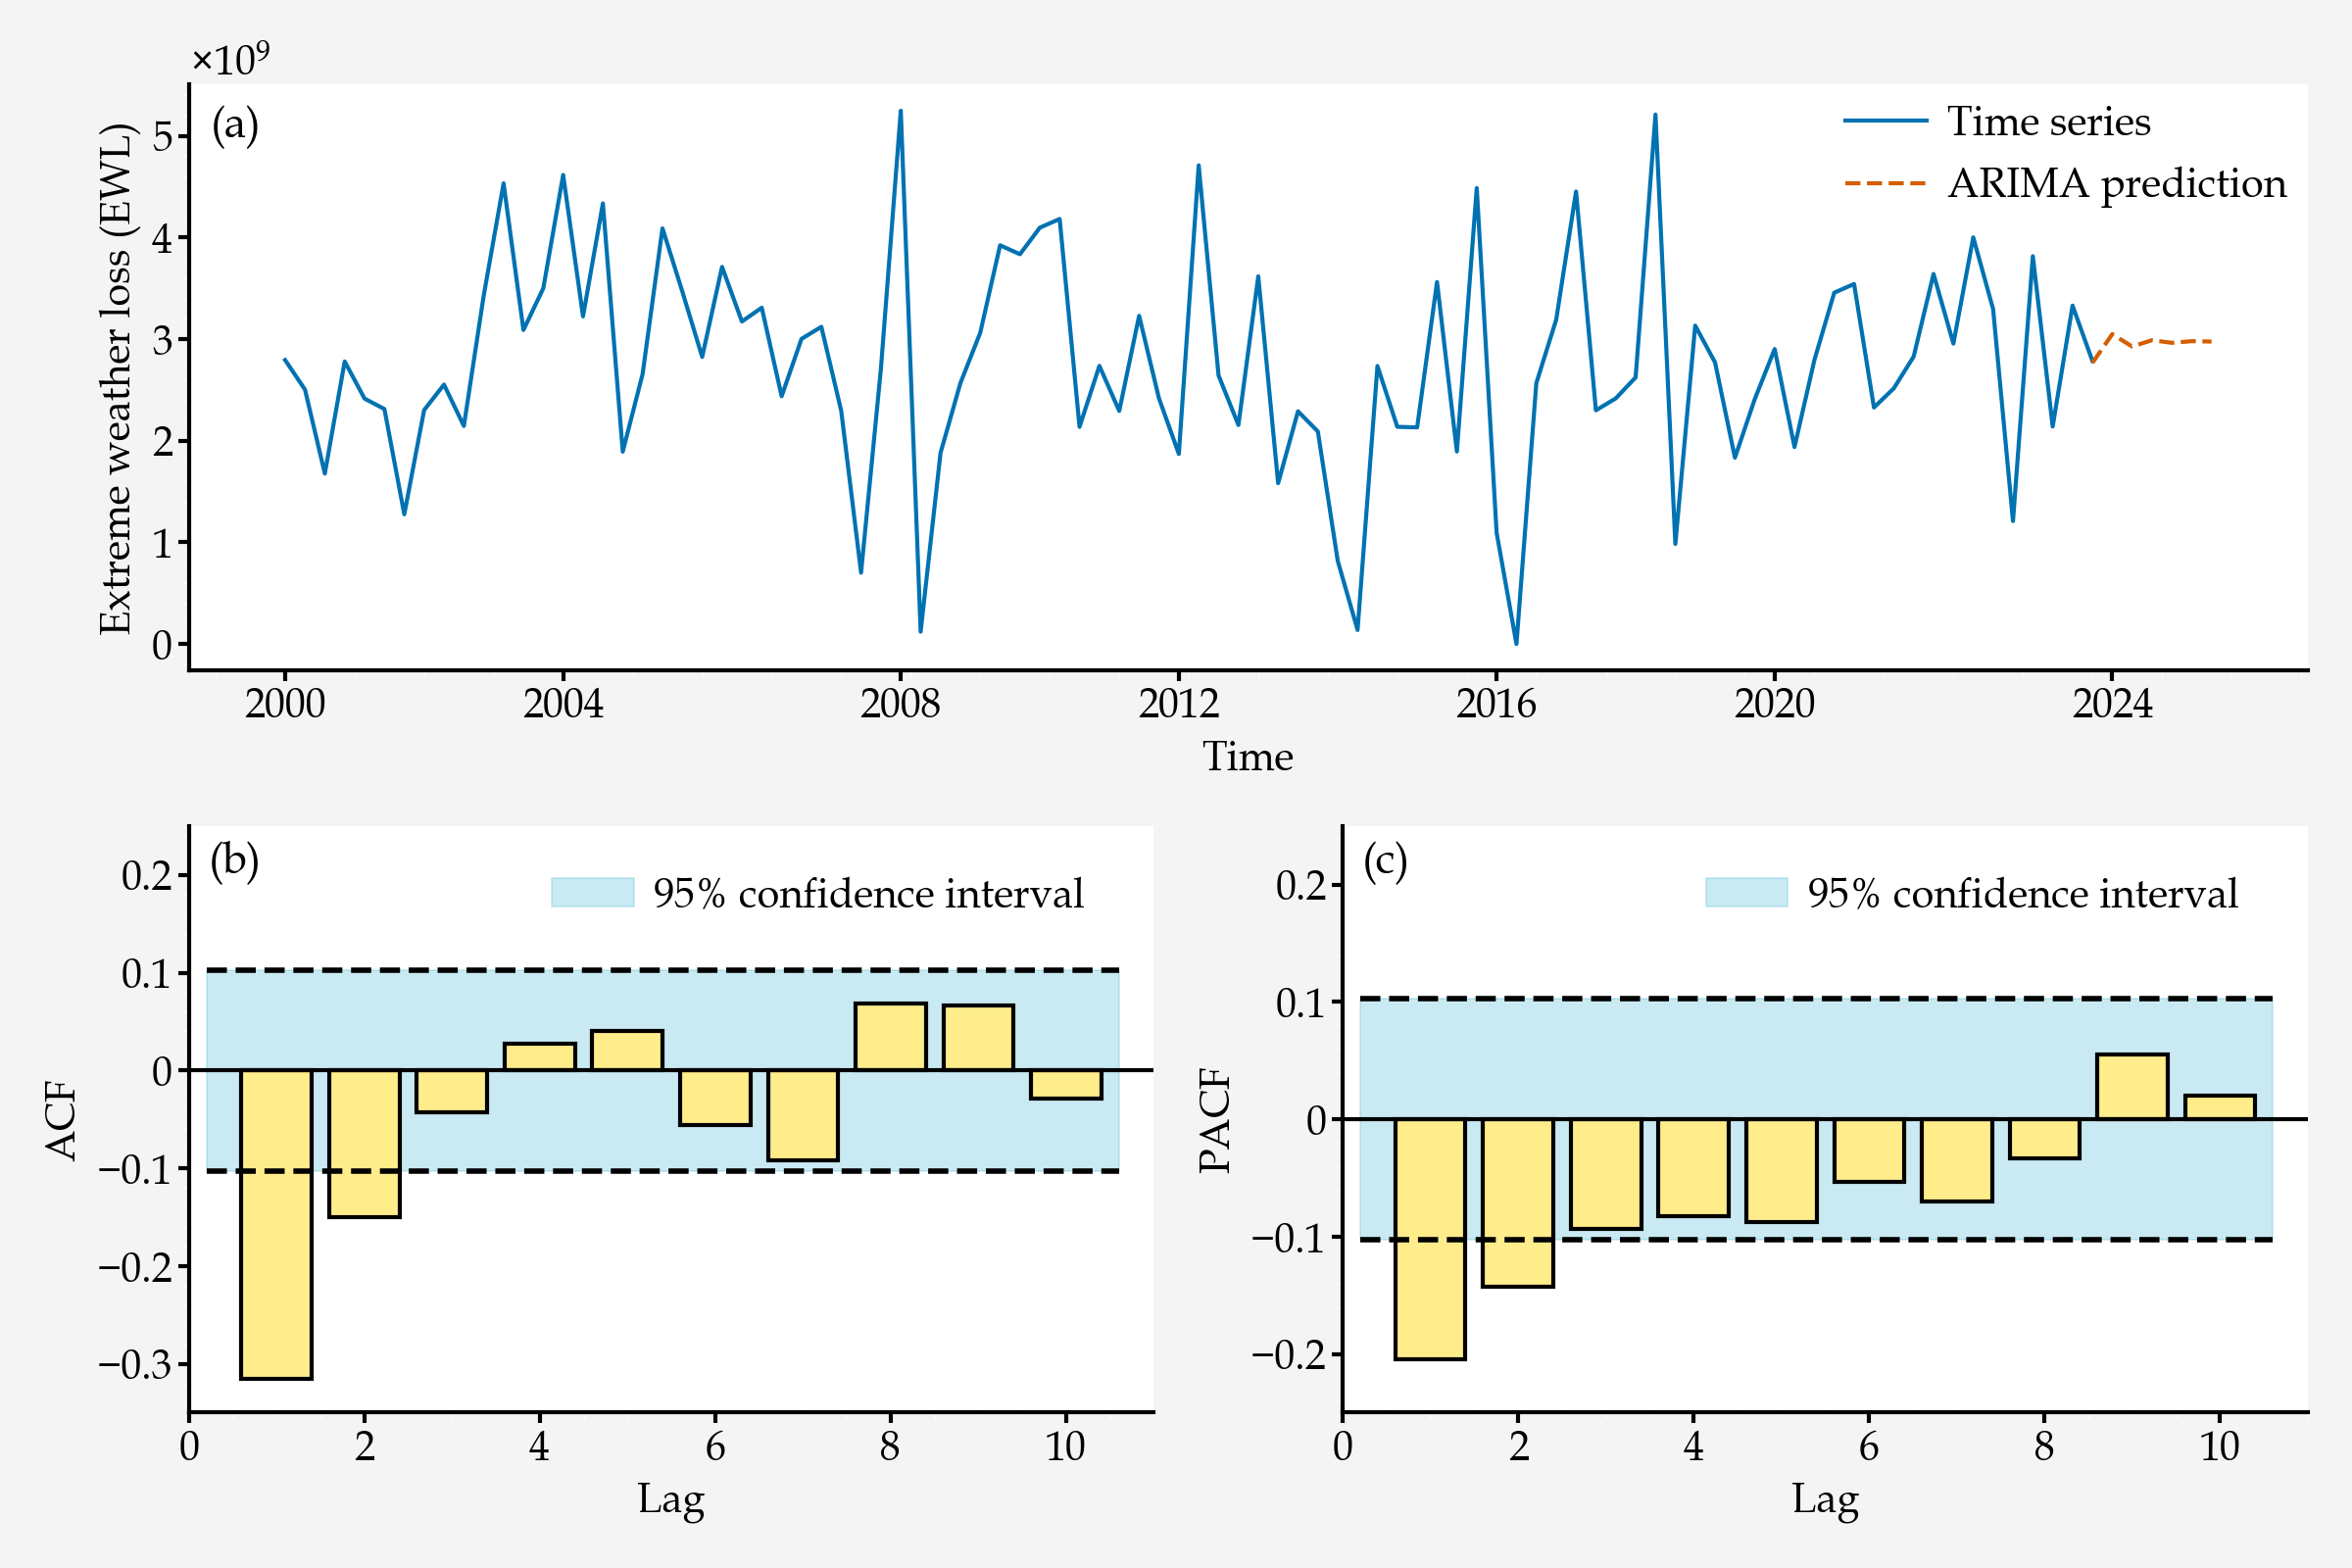

In [19]:
acf = pd.read_excel(r'C:\Users\njtsl\Desktop\acf.xlsx')
pacf = pd.read_excel(r'C:\Users\njtsl\Desktop\pacf.xlsx')

plt.figure(figsize=(12, 8))
gs = GridSpec(2, 2)

ax1 = plt.subplot(gs[0, :])
ax1.plot(raw, lw=1.5, ls='-', label='Time series')
ax1.plot(pre, lw=1.5, ls='--', label='ARIMA prediction')
ax1.set_xlabel('Time')
ax1.set_ylabel('Extreme weather loss (EWL)')
# ax1.set_xlim([0, 11])
# ax1.set_ylim([-0.35, 0.25])
ax1.set_xticklabels(['2000', '2004', '2008', '2012', '2016', '2020', '2024', '2000'])
ax1.tick_params('both', which='major', width=1.5)
ax1.tick_params('both', which='minor', color='w')
ax1.grid(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.legend(frameon=False, fontsize=15)
ax1.text(0.01, 0.91, '(a)', transform=ax1.transAxes, fontsize=16)


ax2 = plt.subplot(gs[1, 0])
ax2.plot([0.2, 10.6], [acf['upper'][0], acf['upper'][0]], color='k', ls='--', lw=2)
ax2.plot([0.2, 10.6], [acf['lower'][0], acf['lower'][0]], color='k', ls='--', lw=2)
ax2.plot(np.arange(0, 12), np.zeros(12), color='k')
ax2.bar(acf['k'][:10], acf['acf'][:10], color='#FFEC8B', ec='k', lw=1.5)
ax2.fill_between([0.2, 10.6], acf['lower'][0], acf['upper'][0], 
                   color='#4DBBD5FF', alpha=0.3, label='95% confidence interval')
ax2.set_xlabel('Lag')
ax2.set_ylabel('ACF')
ax2.set_xlim([0, 11])
ax2.set_ylim([-0.35, 0.25])
ax2.tick_params('both', which='major', width=1.5)
ax2.tick_params('both', which='minor', color='w')
ax2.grid(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)
ax2.legend(frameon=False, bbox_to_anchor=(0.95, 0.95), fontsize=15)
ax2.text(0.02, 0.92, '(b)', transform=ax2.transAxes, fontsize=16)


ax3 = plt.subplot(gs[1, 1])
ax3.plot([0.2, 10.6], [pacf['upper'][0], pacf['upper'][0]], color='k', ls='--', lw=2)
ax3.plot([0.2, 10.6], [pacf['lower'][0], pacf['lower'][0]], color='k', ls='--', lw=2)
ax3.plot(np.arange(0, 12), np.zeros(12), color='k')
ax3.bar(pacf['k'][:10], pacf['pacf'][5:15], color='#FFEC8B', ec='k', lw=1.5)
ax3.fill_between([0.2, 10.6], pacf['lower'][0], pacf['upper'][0], 
                   color='#4DBBD5FF', alpha=0.3, label='95% confidence interval')
ax3.set_xlabel('Lag')
ax3.set_ylabel('PACF')
ax3.set_xlim([0, 11])
ax3.set_ylim([-0.25, 0.25])
ax3.tick_params('both', which='major', width=1.5)
ax3.tick_params('both', which='minor', color='w')
ax3.grid(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_linewidth(1.5)
ax3.spines['bottom'].set_linewidth(1.5)
ax3.legend(frameon=False, bbox_to_anchor=(0.95, 0.95), fontsize=15)
ax3.text(0.02, 0.92, '(c)', transform=ax3.transAxes, fontsize=16)

plt.tight_layout()
# plt.savefig('arima.svg')

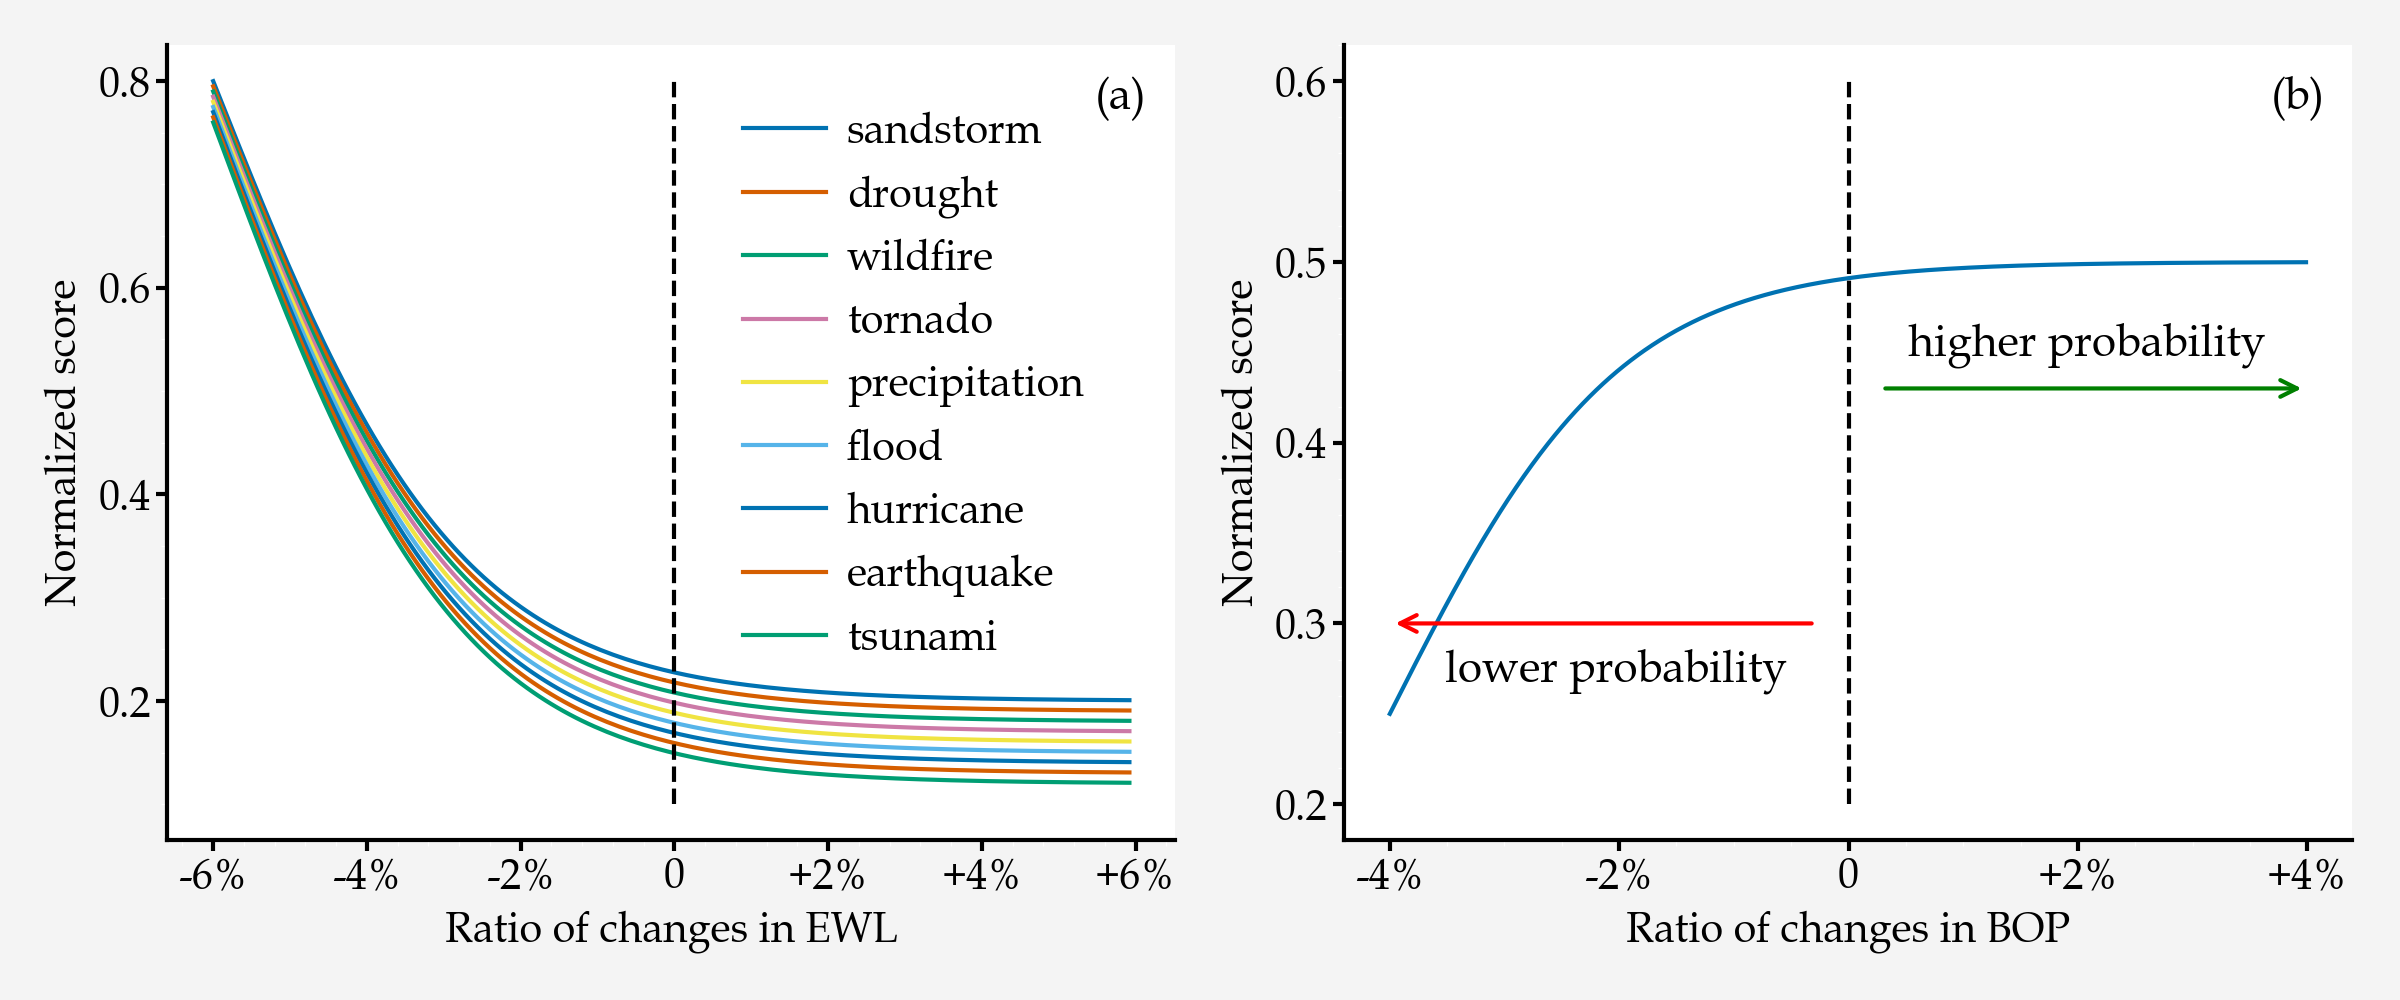

In [129]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

x1 = np.arange(2, 10, 0.01)
y1 = 0.5 / (1 + np.exp(-(x1 - 2)))
x2 = np.arange(0.5, 2, 0.01)
y21 =  - 1.2 / (1 + np.exp(-5 * (x2 - 0.5)))
y22 =  - 1.21 / (1 + np.exp(-5 * (x2 - 0.5)))
y23 =  - 1.22 / (1 + np.exp(-5 * (x2 - 0.5)))
y24 =  - 1.23 / (1 + np.exp(-5 * (x2 - 0.5)))
y25 =  - 1.24 / (1 + np.exp(-5 * (x2 - 0.5)))
y26 =  - 1.25 / (1 + np.exp(-5 * (x2 - 0.5)))
y27 =  - 1.26 / (1 + np.exp(-5 * (x2 - 0.5)))
y28 =  - 1.27 / (1 + np.exp(-5 * (x2 - 0.5)))
y29 =  - 1.28 / (1 + np.exp(-5 * (x2 - 0.5)))
ax[0].plot(x2, y21, label='sandstorm')
ax[0].plot(x2, y22, label='drought')
ax[0].plot(x2, y23, label='wildfire')
ax[0].plot(x2, y24, label='tornado')
ax[0].plot(x2, y25, label='precipitation')
ax[0].plot(x2, y26, label='flood')
ax[0].plot(x2, y27, label='hurricane')
ax[0].plot(x2, y28, label='earthquake')
ax[0].plot(x2, y29, label='tsunami')
ax[0].plot([1.25, 1.25], [-1.3, -0.6], color='k', lw=1.5, ls='--')
ax[0].set_xlabel('Ratio of changes in EWL')
ax[0].set_ylabel('Normalized score')
ax[0].set_xticklabels(['', '-6%', '-4%', '-2%', '0', '+2%', '+4%', '+6%'])
ax[0].set_yticks([-1.2, -1, -0.8, -0.6])
ax[0].set_yticklabels(['0.2', '0.4', '0.6', '0.8'])
ax[0].tick_params('both', which='major', width=1.5)
ax[0].tick_params('both', which='minor', color='w')
ax[0].grid(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_linewidth(1.5)
ax[0].spines['bottom'].set_linewidth(1.5)
ax[0].legend(frameon=False, bbox_to_anchor=(0.55, 0.2), fontsize=15)
ax[0].text(0.92, 0.92, '(a)', transform=ax[0].transAxes, fontsize=16)

ax[1].plot(x1, y1)
ax[1].plot([6, 6], [0.2, 0.6], color='k', lw=1.5, ls='--')
ax[1].set_xlabel('Ratio of changes in BOP')
ax[1].set_ylabel('Normalized score')
# ax[1].set_xlim([0, 5])
# ax[1].set_ylim([0.5, 1.5])
ax[1].set_xticklabels(['', '-4%', '-2%', '0', '+2%', '+4%'])
ax[1].set_yticks([0.2, 0.3, 0.4, 0.5, 0.6])
ax[1].tick_params('both', which='major', width=1.5)
ax[1].tick_params('both', which='minor', color='w')
ax[1].grid(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_linewidth(1.5)
ax[1].spines['bottom'].set_linewidth(1.5)
# ax[1].legend(frameon=False, fontsize=15)
arrow_params = dict(edgecolor='g', arrowstyle='->', shrinkA=5, lw=1.5)
ax[1].annotate('', xy=(10, 0.43), xytext=(6.2, 0.43), arrowprops=arrow_params)
ax[1].text(0.56, 0.61, 'higher probability', transform=ax[1].transAxes, fontsize=16)
arrow_params = dict(edgecolor='r', arrowstyle='->', shrinkA=5, lw=1.5)
ax[1].annotate('', xy=(2, 0.3), xytext=(5.8, 0.3), arrowprops=arrow_params)
ax[1].text(0.10, 0.20, 'lower probability', transform=ax[1].transAxes, fontsize=16)
ax[1].text(0.92, 0.92, '(b)', transform=ax[1].transAxes, fontsize=16)

plt.tight_layout()
# plt.savefig('sensitivity.svg')

In [162]:
import pyecharts.options as opts
from pyecharts.charts import Map

quxian = ['锦江区', '青羊区', '金牛区', '武侯区', '成华区', '龙泉驿区', '简阳市', '金堂县', '青白江区',
          '新都区', '温江区', '双流区', '郫都区', '彭州市', '都江堰市', '崇州市', '大邑县', '蒲江县',
          '新津县', '邛崃市']

seed_value = 80
random.seed(seed_value)
np.random.seed(seed_value)
random.shuffle(quxian)
values = np.random.randint(1, len(quxian) + 1, len(quxian)).tolist()

(
    Map()
    .add(
        series_name="",
        maptype="成都",
        data_pair=[list(z)for z in zip(quxian, values)],
        is_map_symbol_show=False,
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="",
        ),
        visualmap_opts=opts.VisualMapOpts(
            min_=0,
            max_=20,
            range_text=["High", "Low"],
            is_calculable=False,
            range_color=["lightskyblue", "yellow", "orangered"],
        ),
    )
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),
        itemstyle_opts=opts.ItemStyleOpts(border_width=1, border_color='#404040'),  # 调整边界线的粗细
    )
    .render("Chengdu.html")
)

'F:\\南京大学\\科研项目\\Chengdu.html'

In [163]:
from pyecharts import options as opts
from pyecharts.charts import Sunburst

# 数据示例
data = [
    {"name": "A", "value": 10},
    {"name": "B", "children": [
        {"name": "C", "value": 20},
        {"name": "D", "value": 30}
    ]},
    {"name": "E", "value": 40}
]

# 创建南丁格尔图
sunburst_chart = (
    Sunburst()
    .add(series_name="", data_pair=data, radius=[0, "90%"])
    .set_global_opts(title_opts=opts.TitleOpts(title="Sunburst Chart"))
)

# 保存图表为HTML文件或者直接显示
sunburst_chart.render("sunburst_chart.html")
# sunburst_chart.render_notebook()


'F:\\南京大学\\科研项目\\sunburst_chart.html'